In [2]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("Telecom_customer churn.csv")

In [3]:
df[:5]

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [4]:
#what fraction of customers never went over their monthly minutes?
never_over = df[df["ovrmou_Mean"] == 0]
frac_never = len(never_over) * 1.0 / len(df["ovrmou_Mean"]) 
frac_never

0.42603

C:\Users\tsblo\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


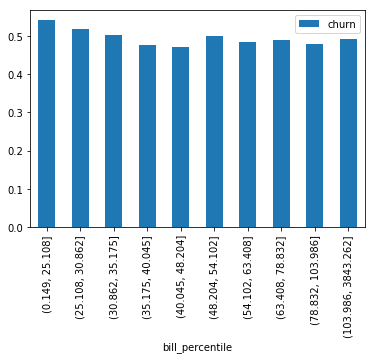

In [12]:
#are customers with high monthly bills more or less likely to churn than regular customers?
df_nonneg = df[df["rev_Mean"] > 0]
bill_percentile = pd.qcut(df_nonneg['rev_Mean'], 10)
bill_percentile[:10]
df_nonneg["bill_percentile"] = bill_percentile
bill_value_counts = df_nonneg["bill_percentile"].value_counts()
bill_value_counts
df_nonneg[:10]
bin_churn = df_nonneg.groupby("bill_percentile")[["churn"]].mean()
bin_churn
bin_churn.plot.bar()


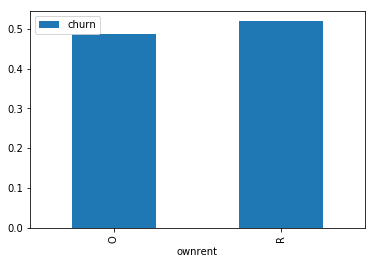

In [20]:
#do renters churn more often than home owners?
df["ownrent"][:20]
rent_churn = df.groupby("ownrent")[["churn"]].mean()
rent_churn.plot.bar()

In [25]:
#what are the biggest differences between churners and non churners excluding categorical variables?
diff_churn = df.groupby("churn")[["rev_Mean", "eqpdays", "ovrrev_Mean", "comp_vce_Mean"]].mean()
diff_churn[:10]

,rev_Mean,eqpdays,ovrrev_Mean,comp_vce_Mean
churn,,,,
0,59.218692,363.280925,12.842879,114.954822
1,58.211074,421.089524,14.290904,102.723098


In [4]:
df_51_75 = df.loc[:, "uniqsubs":"hnd_price"]
df_51_75["churn"] = df["churn"]
pd.set_option('display.max_columns', 500)
df_51_75[:5]


,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,churn
0,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,1
1,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,0
2,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,1
3,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,0
4,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,0


In [49]:
df_churn = df_51_75.groupby("churn")[["totcalls","totmou", "totrev","adjrev","adjmou","adjqty","avgrev","avgmou","avgqty","avg3mou","avg3qty","avg3rev","avg6mou","avg6qty","avg6rev", "hnd_price"]].agg("mean")
df_churn

,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price
churn,,,,,,,,,,,,,,,,
0,2936.439609,7793.975335,1034.475849,962.526742,7695.685523,2896.911535,58.228573,494.167895,177.505869,545.850073,188.720905,59.781296,531.445108,185.436265,59.445354,108.129344
1,2816.796174,7500.178673,1029.329041,957.653627,7394.303770,2774.752189,57.593527,473.100540,169.533305,492.969109,171.805557,58.594972,487.679451,171.247171,57.916832,95.539523


In [51]:
df_churn = df_51_75.groupby("churn")[["totcalls","totmou", "totrev","adjrev","adjmou","adjqty","avgrev","avgmou","avgqty","avg3mou","avg3qty","avg3rev","avg6mou","avg6qty","avg6rev", "hnd_price"]].std()
df_churn

,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price
churn,,,,,,,,,,,,,,,,
0,4086.929791,9275.244363,908.759250,895.634790,9201.758356,4051.475571,36.631958,451.175568,175.447096,549.270722,200.688343,46.462934,513.060074,191.219608,41.262297,61.123188
1,3462.678410,7997.077978,792.036166,779.687702,7926.959209,3429.342441,35.673451,424.923088,159.595591,515.876242,183.879700,46.923757,478.594783,173.465341,40.231013,60.228330


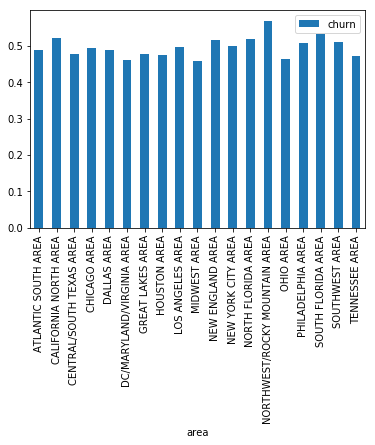

In [57]:
df_churn = df_51_75.groupby("area")[["churn"]].mean()
df_churn.plot.bar()

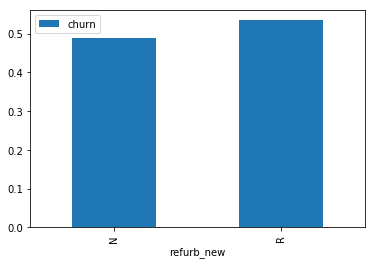

In [58]:
df_churn = df_51_75.groupby("refurb_new")[["churn"]].mean()
df_churn.plot.bar()

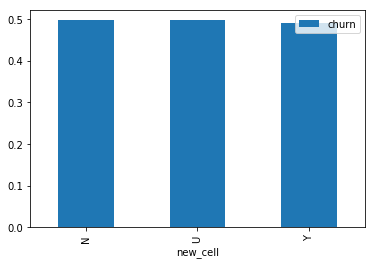

In [59]:
df_churn = df_51_75.groupby("new_cell")[["churn"]].mean()
df_churn.plot.bar()

In [19]:
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics   
from sklearn.model_selection import train_test_split

In [76]:
y, X = dmatrices('churn ~ totcalls + totmou + totrev + adjrev + adjmou + adjqty + avgrev + avgmou + avgqty + avg3mou + avg3qty + avg3rev + avg6mou + avg6qty + avg6rev + hnd_price', data=df_51_75, return_type='dataframe')


In [77]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.684669
         Iterations 4
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.012      
Dependent Variable: churn            AIC:              131965.5276
Date:               2019-08-05 22:42 BIC:              132126.6147
No. Observations:   96347            Log-Likelihood:   -65966.    
Df Model:           16               LL-Null:          -66783.    
Df Residuals:       96330            LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     4.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      0.3050    0.0171   17.8572  0.0000   0.2715   0.3385
totcalls       0.0002    0.0002    1.0544  0.2917

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\tsblo\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.55


In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7783 6665]
 [6263 8194]]


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.55      0.54      0.55     14448
        1.0       0.55      0.57      0.56     14457

avg / total       0.55      0.55      0.55     28905



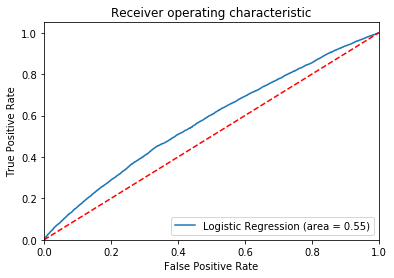

In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [6]:
categorical_columns = ["uniqsubs","actvsubs","new_cell","crclscod","asl_flag","prizm_social_one","area","dualband","refurb_new"]
df_dummies = pd.get_dummies(df_51_75[categorical_columns],
                            prefix=categorical_columns,
                            columns=categorical_columns)
dummy_column_names = df_dummies.columns.values
dummy_column_names[:20]

array(['uniqsubs_1', 'uniqsubs_2', 'uniqsubs_3', 'uniqsubs_4',
       'uniqsubs_5', 'uniqsubs_6', 'uniqsubs_7', 'uniqsubs_8',
       'uniqsubs_9', 'uniqsubs_10', 'uniqsubs_11', 'uniqsubs_12',
       'uniqsubs_13', 'uniqsubs_18', 'uniqsubs_196', 'actvsubs_0',
       'actvsubs_1', 'actvsubs_2', 'actvsubs_3', 'actvsubs_4'],
      dtype=object)

In [7]:
# Concatenate all these new dummy columns into the old dataframe
df_51_75 = pd.concat([df_51_75, df_dummies], axis=1)

In [13]:
formula = 'churn ~ 0 + {}'.format(' + '.join(['Q("{}")'.format(x) for x in dummy_column_names]))
print formula

churn ~ 0 + Q("uniqsubs_1") + Q("uniqsubs_2") + Q("uniqsubs_3") + Q("uniqsubs_4") + Q("uniqsubs_5") + Q("uniqsubs_6") + Q("uniqsubs_7") + Q("uniqsubs_8") + Q("uniqsubs_9") + Q("uniqsubs_10") + Q("uniqsubs_11") + Q("uniqsubs_12") + Q("uniqsubs_13") + Q("uniqsubs_18") + Q("uniqsubs_196") + Q("actvsubs_0") + Q("actvsubs_1") + Q("actvsubs_2") + Q("actvsubs_3") + Q("actvsubs_4") + Q("actvsubs_5") + Q("actvsubs_6") + Q("actvsubs_7") + Q("actvsubs_8") + Q("actvsubs_9") + Q("actvsubs_11") + Q("actvsubs_53") + Q("new_cell_N") + Q("new_cell_U") + Q("new_cell_Y") + Q("crclscod_A") + Q("crclscod_A2") + Q("crclscod_A3") + Q("crclscod_AA") + Q("crclscod_B") + Q("crclscod_B2") + Q("crclscod_BA") + Q("crclscod_C") + Q("crclscod_C2") + Q("crclscod_C5") + Q("crclscod_CA") + Q("crclscod_CC") + Q("crclscod_CY") + Q("crclscod_D") + Q("crclscod_D2") + Q("crclscod_D4") + Q("crclscod_D5") + Q("crclscod_DA") + Q("crclscod_E") + Q("crclscod_E2") + Q("crclscod_E4") + Q("crclscod_EA") + Q("crclscod_EC") + Q("crcl

In [14]:
from patsy import dmatrices
Y, X = dmatrices(formula, df_51_75, return_type='dataframe')

In [15]:
y = Y['churn'].values
y[:10]

array([1., 0., 1., 0., 0., 0., 1., 0., 0., 0.])

In [16]:
from sklearn import naive_bayes
model = naive_bayes.MultinomialNB()

In [17]:
model.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [24]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.5078666666666667)


In [25]:
df_51_75["churn"].value_counts()

0    50438
1    49562
Name: churn, dtype: int64

In [26]:
print 'Prior probability for the negative class is',
print exp(model.class_log_prior_[0])
print 'Prior probability for the positive class is',
print exp(model.class_log_prior_[1])

Prior probability for the negative class is 0.5043799999999996
Prior probability for the positive class is 0.49562


In [30]:
feature_importances = abs(model.feature_log_prob_[1] - model.feature_log_prob_[0])
feature_importance_series = Series(feature_importances, index=X.columns.values)
feature_importance_series.sort_values(ascending=False)[:10]

Q("crclscod_E2")    1.539941
Q("actvsubs_9")     1.404498
Q("crclscod_D5")    1.378901
Q("actvsubs_8")     1.116816
Q("uniqsubs_13")    1.116816
Q("uniqsubs_10")    0.999033
Q("crclscod_H")     0.962625
Q("uniqsubs_11")    0.934495
Q("crclscod_TP")    0.934495
Q("crclscod_C5")    0.823363
dtype: float64

In [49]:
top_10_feature_indices = feature_importance_series.sort_values(ascending=False)[:10].index.values
inter_class_differences = model.feature_log_prob_[1] - model.feature_log_prob_[0]
new_feature_importance_series = Series(inter_class_differences, index=X.columns.values)

new_feature_importance_series[top_10_feature_indices]

Q("crclscod_E2")   -1.539941
Q("actvsubs_9")     1.404498
Q("crclscod_D5")   -1.378901
Q("actvsubs_8")     1.116816
Q("uniqsubs_13")    1.116816
Q("uniqsubs_10")    0.999033
Q("crclscod_H")    -0.962625
Q("uniqsubs_11")    0.934495
Q("crclscod_TP")    0.934495
Q("crclscod_C5")   -0.823363
dtype: float64

In [29]:
df_51_75[:5]

,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,churn,uniqsubs_1,uniqsubs_2,uniqsubs_3,uniqsubs_4,uniqsubs_5,uniqsubs_6,uniqsubs_7,uniqsubs_8,uniqsubs_9,uniqsubs_10,uniqsubs_11,uniqsubs_12,uniqsubs_13,uniqsubs_18,uniqsubs_196,actvsubs_0,actvsubs_1,actvsubs_2,actvsubs_3,actvsubs_4,actvsubs_5,actvsubs_6,actvsubs_7,actvsubs_8,actvsubs_9,actvsubs_11,actvsubs_53,new_cell_N,new_cell_U,new_cell_Y,crclscod_A,crclscod_A2,crclscod_A3,crclscod_AA,crclscod_B,crclscod_B2,crclscod_BA,crclscod_C,crclscod_C2,crclscod_C5,crclscod_CA,crclscod_CC,crclscod_CY,crclscod_D,crclscod_D2,crclscod_D4,crclscod_D5,crclscod_DA,crclscod_E,crclscod_E2,crclscod_E4,crclscod_EA,crclscod_EC,crclscod_EF,crclscod_EM,crclscod_G,crclscod_GA,crclscod_GY,crclscod_H,crclscod_I,crclscod_IF,crclscod_J,crclscod_JF,crclscod_K,crclscod_L,crclscod_M,crclscod_O,crclscod_P1,crclscod_S,crclscod_TP,crclscod_U,crclscod_U1,crclscod_V,crclscod_V1,crclscod_W,crclscod_Y,crclscod_Z,crclscod_Z1,crclscod_Z2,crclscod_Z4,crclscod_Z5,crclscod_ZA,crclscod_ZF,crclscod_ZY,asl_flag_N,asl_flag_Y,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,area_ATLANTIC SOUTH AREA,area_CALIFORNIA NORTH AREA,area_CENTRAL/SOUTH TEXAS AREA,area_CHICAGO AREA,area_DALLAS AREA,area_DC/MARYLAND/VIRGINIA AREA,area_GREAT LAKES AREA,area_HOUSTON AREA,area_LOS ANGELES AREA,area_MIDWEST AREA,area_NEW ENGLAND AREA,area_NEW YORK CITY AREA,area_NORTH FLORIDA AREA,area_NORTHWEST/ROCKY MOUNTAIN AREA,area_OHIO AREA,area_PHILADELPHIA AREA,area_SOUTH FLORIDA AREA,area_SOUTHWEST AREA,area_TENNESSEE AREA,dualband_N,dualband_T,dualband_U,dualband_Y,refurb_new_N,refurb_new_R
0,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
1,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0


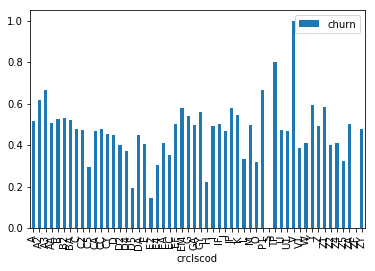

In [31]:
df_churn = df_51_75.groupby("crclscod")[["churn"]].mean()
df_churn.plot.bar()

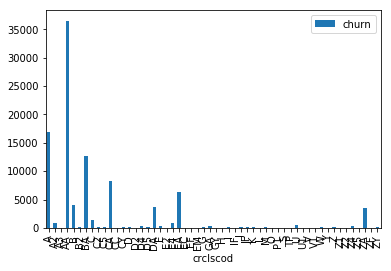

In [37]:
df_churn = df_51_75.groupby("crclscod")[["churn"]].count()
df_churn.plot.bar()

In [47]:
df_51_75[df_51_75["crclscod"] == "E2"].count()[:1]

uniqsubs    21
dtype: int64

In [48]:
mask = df_51_75["crclscod"] == "E2"
df_51_75[mask]["churn"].value_counts()

0    18
1     3
Name: churn, dtype: int64

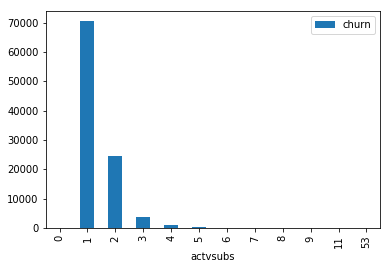

In [34]:
df_churn = df_51_75.groupby("actvsubs")[["churn"]].count()
df_churn.plot.bar()

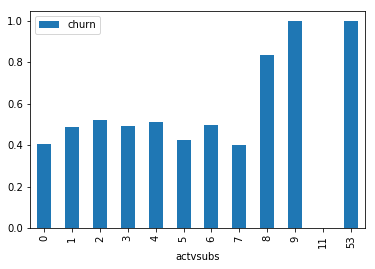

In [40]:
df_churn = df_51_75.groupby("actvsubs")[["churn"]].mean()
df_churn.plot.bar()

In [42]:
df_51_75[df_51_75["actvsubs"] == 7].count()[:1]

uniqsubs    5
dtype: int64

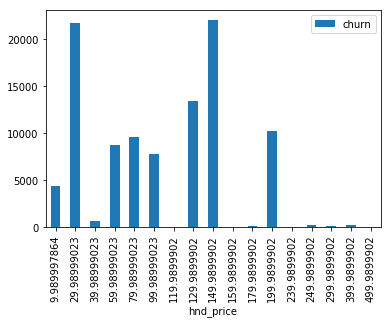

In [50]:
df_churn = df_51_75.groupby("hnd_price")[["churn"]].count()
df_churn.plot.bar()

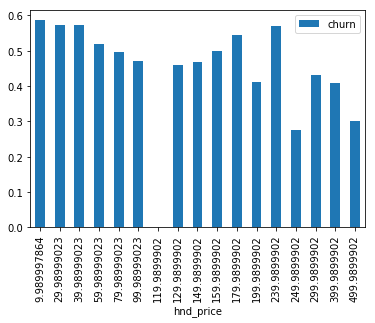

In [51]:
df_churn = df_51_75.groupby("hnd_price")[["churn"]].mean()
df_churn.plot.bar()